# Flood Adaptation: Minimal Model 
### Group 26
Elisa Arts [4780396]
Liss van Wensveen [5086477] 
Shanaya Doerdjan [5049881]


This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is determined based on the location of the household on the map. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

_This notebook was tested on 2024-01-25 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

---------  -----------------------------  ---------------  --------------  ----------
Household  Likelihood to adapt neighbour  Economic damage  Ready to adapt  Is adapted
{0}        {0}                            {0}              {False}         {False}
---------  -----------------------------  ---------------  --------------  ----------
---------  -----------------------------  -------------------  --------------  ----------
Household  Likelihood to adapt neighbour  Economic damage      Ready to adapt  Is adapted
{1}        {0}                            {288763.6835051973}  {False}         {False}
---------  -----------------------------  -------------------  --------------  ----------
---------  -----------------------------  --------------------  --------------  ----------
Household  Likelihood to adapt neighbour  Economic damage       Ready to adapt  Is adapted
{2}        {0}                            {193402.73824430656}  {False}         {False}
---------  ---------------------

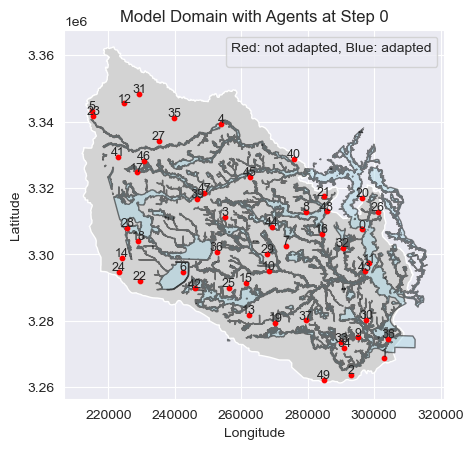

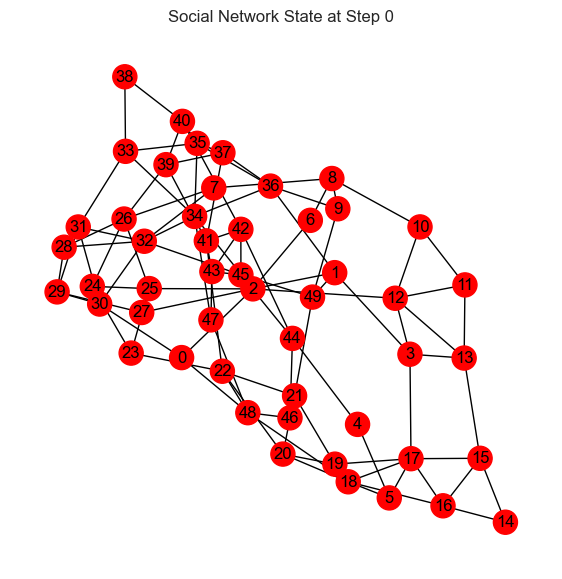

<Figure size 1000x600 with 0 Axes>

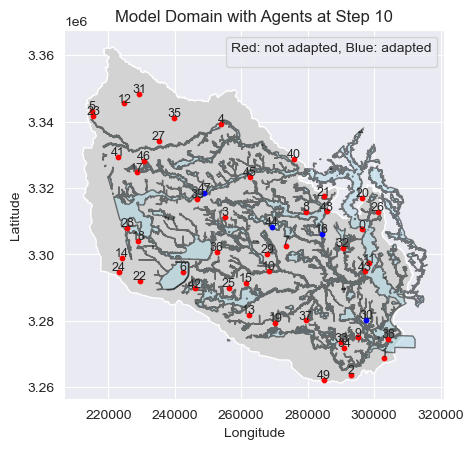

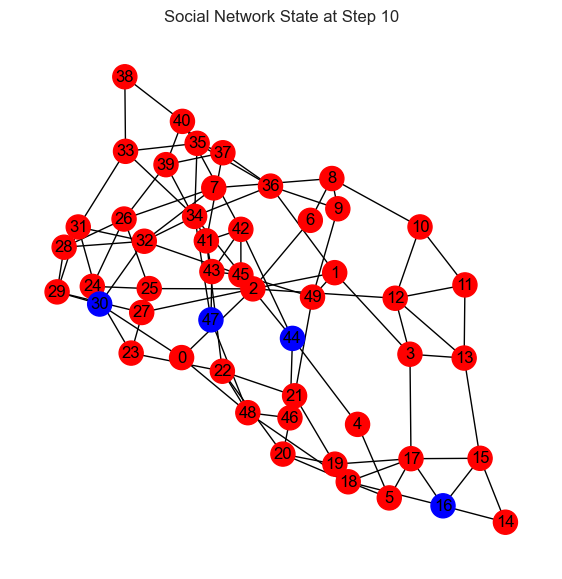

<Figure size 1000x600 with 0 Axes>

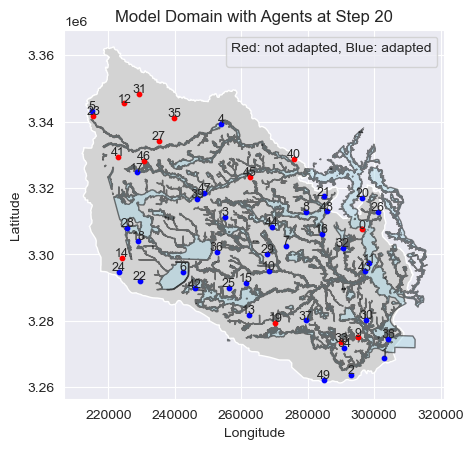

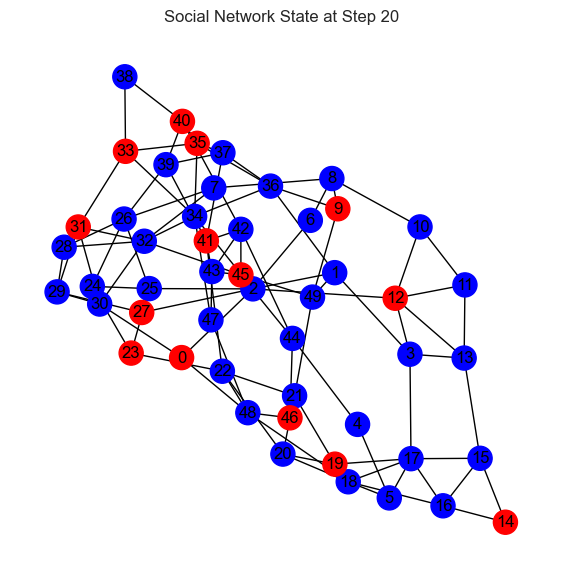

<Figure size 1000x600 with 0 Axes>

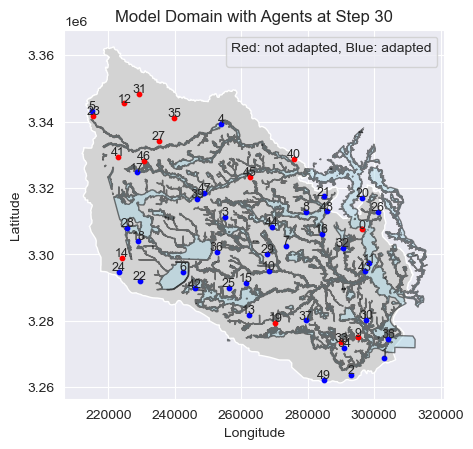

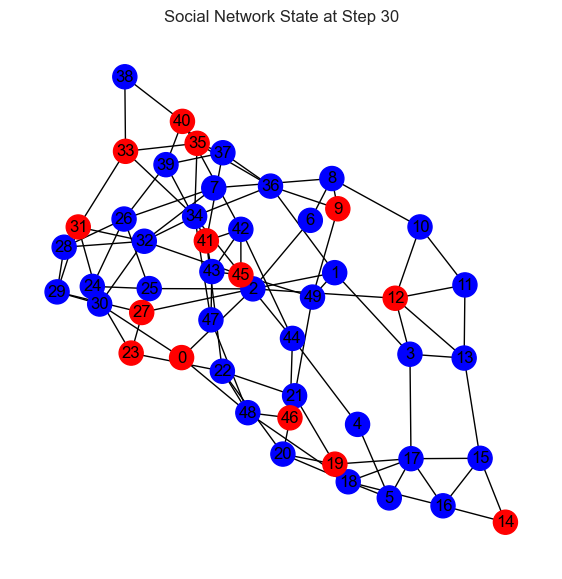

<Figure size 1000x600 with 0 Axes>

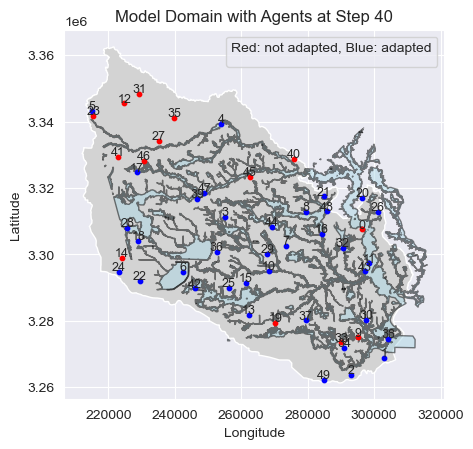

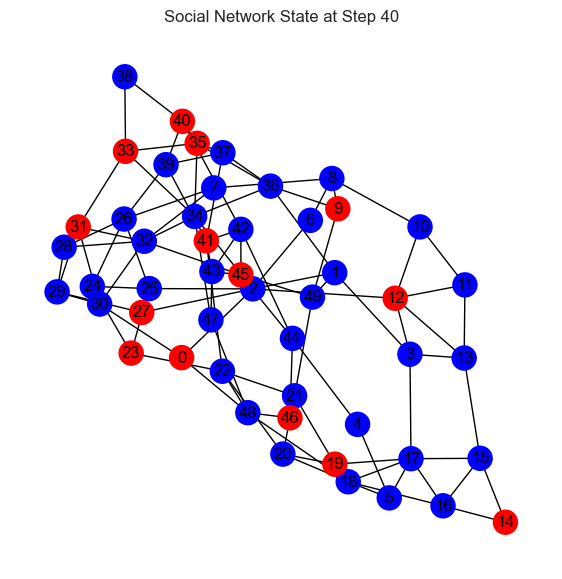

<Figure size 1000x600 with 0 Axes>

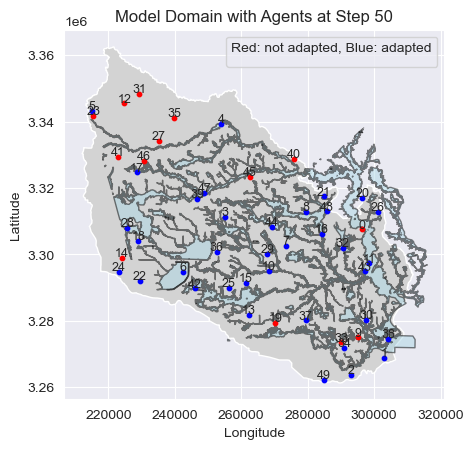

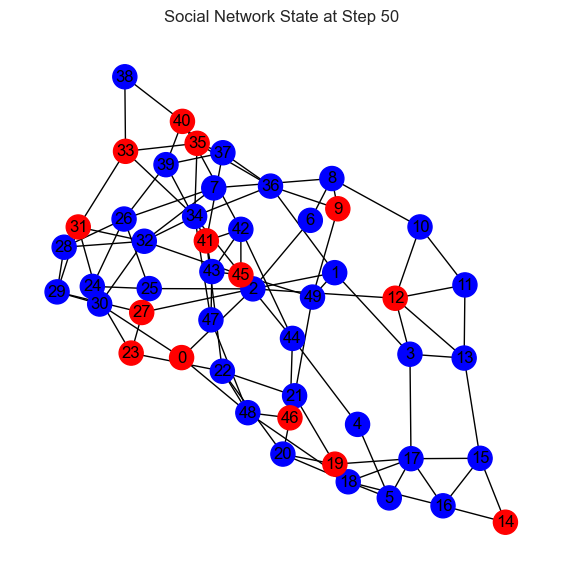

<Figure size 1000x600 with 0 Axes>

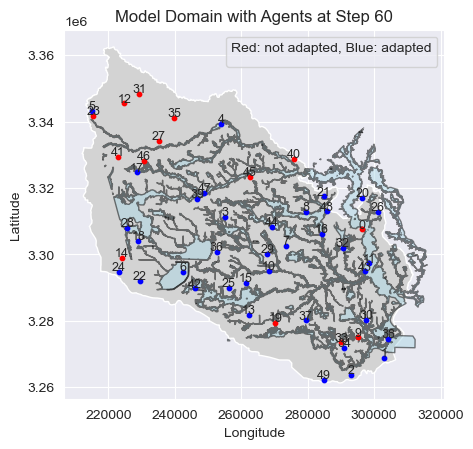

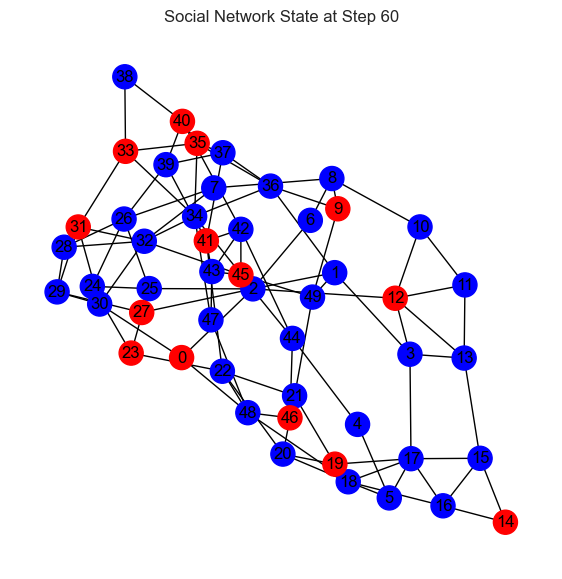

<Figure size 1000x600 with 0 Axes>

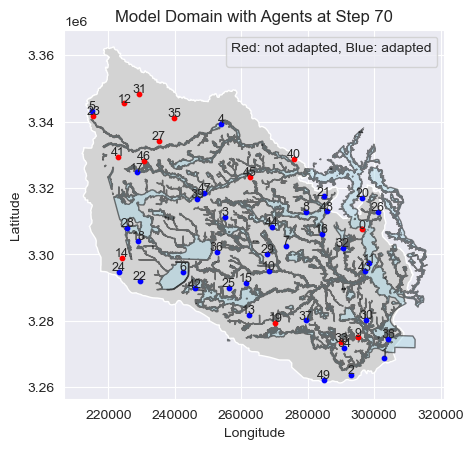

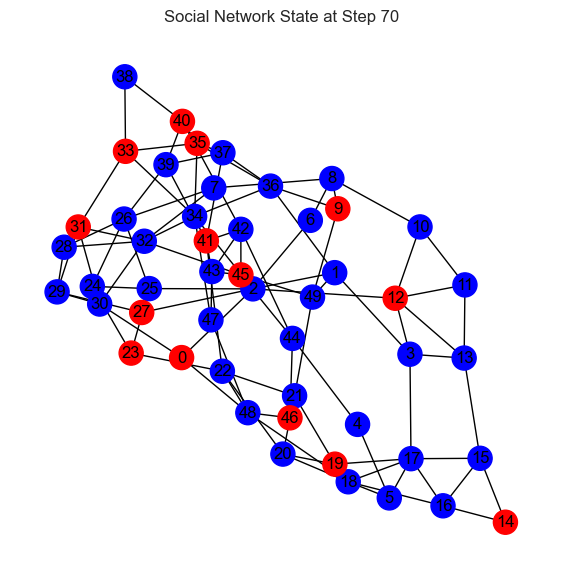

<Figure size 1000x600 with 0 Axes>

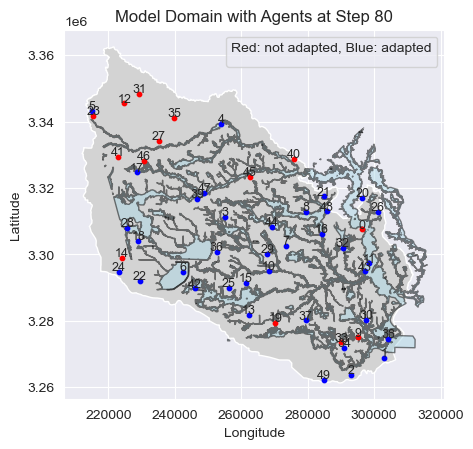

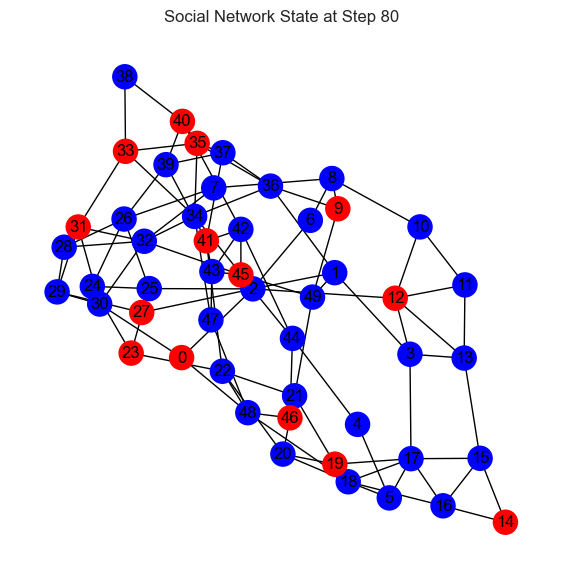

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import mesa
import pandas as pd



# Initialize the Adaptation Model with 50 household agents, the flood map of storm Harvey and the Watts Strogatz social network structure.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") 

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 80 steps and generate plots every 10 steps.
for step in range(80):
    model.step()

    # Every 10 steps, generate and display plots for both the spatial distribution and network.
    if (step + 1) % 10 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [2]:
# Create a DataFrame of the agent data
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   0.000000              0.000000          0.000000   
     1                   3.162081              0.849305          0.000000   
     2                   0.634356              0.568832          0.000000   
     3                   0.611450              0.562410          0.000000   
     4                   2.364632              0.798565          0.000000   
...                           ...                   ...               ...   
79   45                  0.000000              0.000000          0.000000   
     46                  0.000000              0.000000          0.000000   
     47                  7.909590              1.000000          9.552904   
     48                  0.294861              0.435070          0.340235   
     49                  0.120142              0.278309          0.148985   

              FloodDamageActual  IsAdapted  \
Step AgentID                                 
0    0                 0.000000      False   
     1                 0.000000      False   
     2                 0.000000      False   
     3                 0.000000      False   
     4                 0.000000      False   
...                         ...        ...   
79   45                0.000000      False   
     46                0.000000      False   
     47                1.000000       True   
     48                0.460060       True   
     49                0.315878       True   

                                                   location   Savings  \
Step AgentID                                                            
0    0          POINT (296483.6988367868 3307504.029715591)    5000.0   
     1        POINT (303013.69415709784 3268943.3783242297)    2500.0   
     2        POINT (293065.61010693654 3263823.7712935326)    1000.0   
     3        POINT (255098.76686685998 3311254.5906760083)    2500.0   
     4        POINT (253872.34504182462 3339238.1853562784)    2500.0   
...                                                     ...       ...   
79   45        POINT (262660.9731380902 3323239.4609179213)  123500.0   
     46        POINT (230731.2328380532 3328229.2132333443)  119500.0   
     47       POINT (248934.01230062038 3318588.5216903826)   13500.0   
     48        POINT (285750.19365836686 3312973.063823165)   19500.0   
     49         POINT (284996.4346078729 3262294.991699843)   21000.0   

              LikelihoodToAdapt  
Step AgentID                     
0    0                 0.000000  
     1                 0.849305  
     2                 0.568832  
     3                 0.562410  
     4                 0.798565  
...                         ...  
79   45                0.620841  
     46                0.465427  
     47                0.955228  
     48                0.435070  
     49                0.468460  

[4000 rows x 8 columns]

In [3]:
# Create a DataFrame of the model data
model_data = model.datacollector.get_model_vars_dataframe()
model_data

total_adapted_households  total_expected_value_of_economic_damage  \
0                          0                             7.198855e+06   
1                          0                             7.198855e+06   
2                          0                             7.198855e+06   
3                          0                             7.198855e+06   
4                          0                             7.198856e+06   
..                       ...                                      ...   
75                        36                             6.619569e+06   
76                        36                             6.619569e+06   
77                        36                             6.614028e+06   
78                        36                             6.612578e+06   
79                        36                             6.596437e+06   

    average_flood_damage_estimated  
0                         0.423462  
1                         0.423462  
2                         0.423462  
3                         0.423462  
4                         0.423462  
..                             ...  
75                        0.389386  
76                        0.389386  
77                        0.389060  
78                        0.388975  
79                        0.388026  

[80 rows x 3 columns]

# 2. Verification
For the verification of some of the agent methods a plot is created in which the behaviour of a single household over time can be seen. 

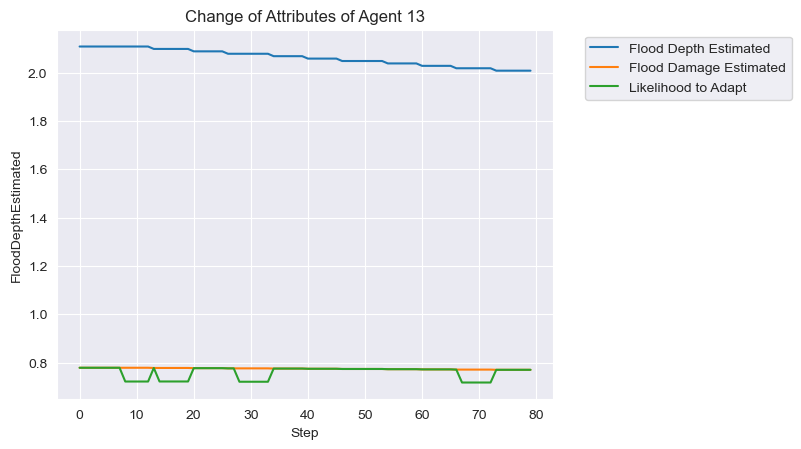

In [4]:
# Specify the agents to plot
agents_to_plot = [13]

# Filter the agent data for the specified agents
agent_data_to_plot = agent_data[agent_data.index.get_level_values("AgentID").isin(agents_to_plot)]

# Plotting
g = sns.lineplot(data=agent_data_to_plot, x='Step', y='FloodDepthEstimated', label='Flood Depth Estimated')
g = sns.lineplot(data=agent_data_to_plot, x='Step', y='FloodDamageEstimated', label='Flood Damage Estimated')
g = sns.lineplot(data=agent_data_to_plot, x='Step', y='LikelihoodToAdapt', label='Likelihood to Adapt')

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.title('Change of Attributes of Agent 13')
plt.show()

# 3. Sensitivity Analysis
In the sensitivity analysis the influence of two important parameter values are changed to see how this impacts the KPI's: total adapted households, total expected value of economic damage, average flood damage estimated. The two variables that are changed are the 'influential threshold' and the 'percentage of influence'. 


### 3.1 Influence of influential threshold
The value of the influential threshold in the base case is 0.20. This value is increased and decreased by 50%, so the tested values are 0.1, 0.2 and 0.3. The effect of these changes on the KPI's are plotted.

In [5]:
# Parameter set for the sensitivity analysis (SA) of the influential_threshold variable
parameters_SA_influential_threshold = {'number_of_households' : 50, 'flood_map_choice': 'harvey', 'network': 'watts_strogatz', 'probability_of_network_connection': 0.4, 'number_of_edges': 3, 'number_of_nearest_neighbours': 5, 'initial_savings_small': 1000, 'initial_savings_medium': 2500, 'initial_savings_large': 5000, 'economic_damage_multiplier': 340000, 'measure_costs': 10000, 'government_subsidy': 1500, 'step_of_flood': 5, 'influential_threshold' : [0.1, 0.2, 0.3], 'percentage_of_influence':  0.1, 'savings_threshold': 2, 'percentage_savings_spent': 0.5}

In [6]:
# Batch run for the sensitivity analysis of the influential_threshold variable
results = mesa.batch_run(
    AdaptationModel,
    parameters=parameters_SA_influential_threshold,
    iterations=50,
    max_steps=80,
    number_processes=1,
    data_collection_period=-1, # Only keeps track of the last step of an iteration
    display_progress=True,
)

# Turn the results into a DataFrame
results_SA_influential_threshold_df = pd.DataFrame(results)

  0%|          | 0/150 [00:00<?, ?it/s]

---------  -----------------------------  --------------------  --------------  ----------
Household  Likelihood to adapt neighbour  Economic damage       Ready to adapt  Is adapted
{0}        {0}                            {170195.12327600652}  {False}         {False}
---------  -----------------------------  --------------------  --------------  ----------
---------  -----------------------------  --------------------  --------------  ----------
Household  Likelihood to adapt neighbour  Economic damage       Ready to adapt  Is adapted
{1}        {0}                            {176093.77542456274}  {False}         {False}
---------  -----------------------------  --------------------  --------------  ----------
---------  -----------------------------  -------------------  --------------  ----------
Household  Likelihood to adapt neighbour  Economic damage      Ready to adapt  Is adapted
{2}        {0}                            {201989.3139672555}  {False}         {False}
---------  

In [7]:
# Filter the dataframe, so it only contains the results of one agent. The value is the same for every agent since the KPI's are model parameters, so it doesn't matter which agent you pick.
results_SA_influential_threshold_filtered = results_SA_influential_threshold_df[(results_SA_influential_threshold_df.AgentID == 0) & (results_SA_influential_threshold_df.Step == 80)]

# Keep only the columns that are needed to make the plots
results_SA_influential_threshold_filtered[['RunId', 'Step', 'total_adapted_households', 'influential_threshold', 'total_expected_value_of_economic_damage','average_flood_damage_estimated','AgentID']].reset_index(
    drop=True    
).head(3)

RunId  Step  total_adapted_households  influential_threshold  \
0      0    80                        41                    0.1   
1      1    80                        40                    0.2   
2      2    80                        41                    0.3   

   total_expected_value_of_economic_damage  average_flood_damage_estimated  \
0                             7.868549e+06                        0.462856   
1                             7.815839e+06                        0.459755   
2                             7.506451e+06                        0.441556   

   AgentID  
0        0  
1        0  
2        0

TypeError: pointplot() got an unexpected keyword argument 'linestyle'

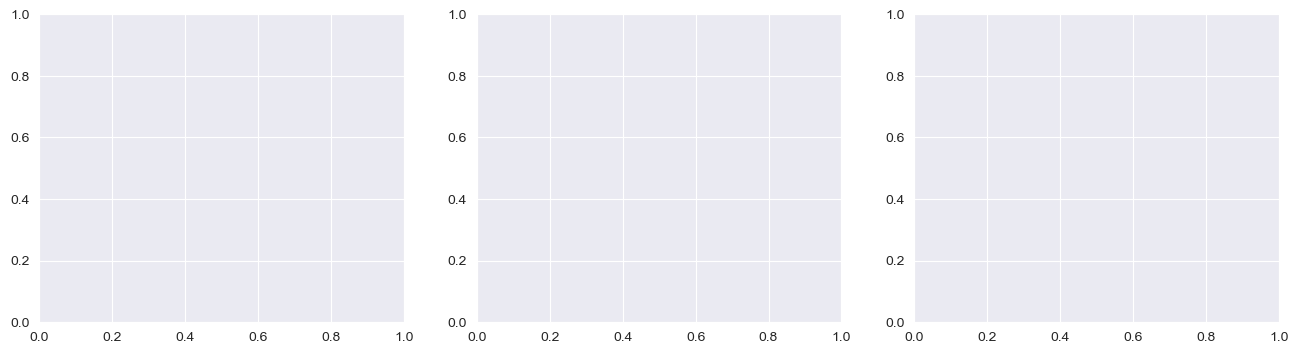

In [8]:
# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Plot the point plot of the total adapted households on the first subplot
g1 = sns.pointplot(data=results_SA_influential_threshold_filtered, x="influential_threshold", y="total_adapted_households", linestyle='none', ax=axes[0])
g1.set(
    xlabel="Influential threshold",
    ylabel="Total adapted household",
    title="Impact of Influential Threshold on Total Adapted Households",
)

# Plot the point plot of the total expected value of economic damage on the second subplot
g2 = sns.pointplot(data=results_SA_influential_threshold_filtered, x="influential_threshold", y="total_expected_value_of_economic_damage", linestyle='none', ax=axes[1])
g2.set(
    xlabel="Influential threshold",
    ylabel="Total expected value of economic damage",
    title="Impact of Influential Threshold on Total Expected Value of Economic Damage",
)

# Plot the point plot of the average flood damage estimated on the third subplot
g3 = sns.pointplot(data=results_SA_influential_threshold_filtered, x="influential_threshold", y="average_flood_damage_estimated", linestyle='none', ax=axes[2])
g3.set(
    xlabel="Influential threshold",
    ylabel="Average flood damage estimated",
    title="Impact of Influential Threshold on Average Flood Damage Estimated",
)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### 3.2 Influence of percentage of influence

The value of the percentage of influence in the base case is 0.10. This value is increased and decreased by 50%, so the tested values are 0.05, 0.1 and 0.15. The effect of these changes on the KPI’s are plotted.

In [ ]:
# Parameter set for the sensitivity analysis (SA) of the percentage_of_influence variable
parameters_SA_percentage_of_influence = {'number_of_households' : 50, 'flood_map_choice': 'harvey', 'network': 'watts_strogatz', 'probability_of_network_connection': 0.4, 'number_of_edges': 3, 'number_of_nearest_neighbours': 5, 'initial_savings_small': 1000, 'initial_savings_medium': 2500, 'initial_savings_large': 5000, 'economic_damage_multiplier': 340000, 'measure_costs': 10000, 'government_subsidy': 1500, 'step_of_flood': 5, 'influential_threshold' : 0.2, 'percentage_of_influence':  [0.05, 0.1, 0.15], 'savings_threshold': 2, 'percentage_savings_spent': 0.5}

In [ ]:
# Batch run for the sensitivity analysis of the percentage_of_influence variable
results = mesa.batch_run(
    AdaptationModel,
    parameters=parameters_SA_percentage_of_influence,
    iterations=50,
    max_steps=80,
    number_processes=1,
    data_collection_period=-1, # only keeps track of the last step of an iteration
    display_progress=True,
)

# Turn the results into a DataFrame
results_SA_percentage_of_influence_df = pd.DataFrame(results)

In [ ]:
# Filter the dataframe, so it only contains the results of one agent. The value is the same for every agent since the KPI's are model parameters, so it doesn't matter which agent you pick.
results_SA_percentage_of_influence_filtered = results_SA_percentage_of_influence_df[(results_SA_percentage_of_influence_df.AgentID == 0) & (results_SA_percentage_of_influence_df.Step == 80)]

# Keep only the columns that are needed to make the plots
results_SA_percentage_of_influence_filtered[['RunId', 'Step', 'total_adapted_households', 'percentage_of_influence', 'total_expected_value_of_economic_damage','average_flood_damage_estimated','AgentID']].reset_index(
    drop=True    
).head(3)

In [ ]:
# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Plot the point plot of the total adapted households on the first subplot
g1 = sns.pointplot(data=results_SA_percentage_of_influence_filtered, x="percentage_of_influence", y="total_adapted_households", linestyle='none', ax=axes[0])
g1.set(
    xlabel="Percentage of influence",
    ylabel="Total adapted household",
    title="Impact of Percentage of Influence on Total Adapted Households",
)

# Plot the point plot of the total expected value of economic damage on the second subplot
g2 = sns.pointplot(data=results_SA_percentage_of_influence_filtered, x="percentage_of_influence", y="total_expected_value_of_economic_damage", linestyle='none', ax=axes[1])
g2.set(
    xlabel="Percentage of influence",
    ylabel="Total expected value of economic damage",
    title="Impact of Percentage of Influence Total Expected Value of Economic Damage",
)

# Plot the point plot of the average flood damage estimated on the third subplot
g3 = sns.pointplot(data=results_SA_percentage_of_influence_filtered, x="percentage_of_influence", y="average_flood_damage_estimated", linestyle='none', ax=axes[2])
g3.set(
    xlabel="Percentage of influence",
    ylabel="Average flood damage estimated",
    title="Impact of Percentage of Influence Average Flood Damage Estimated",
)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# 4. Analysis of Policy Implementation

In this part the experiments with different policies are run. The policy that is tested, is the amount of subsidy from the government. This value is equal to $1500 in the base case and the amounts of subsidy that is given in the different experiments is: 0, 750, 1500 and 2250. It is good to notice that this amount of subsidy is given every quarter of a year. The annual subsidies are thus: 0, 3000, 6000, 9000. 

The effect of the policy is measured by comparing the values of the KPI's: total adapted households, total expected value of economic damage, average flood damage estimated. 

### 4.1 Analysis of Final Values
First, the influence of the policy on the final values of every run is investigated. To make it easier to interpret these outcomes, the KPI's have been plotted.

In [ ]:
# Parameter set for the policy testing (PT)
parameters_PT = {'number_of_households' : 50, 'flood_map_choice': 'harvey', 'network': 'watts_strogatz', 'probability_of_network_connection': 0.4, 'number_of_edges': 3, 'number_of_nearest_neighbours': 5, 'initial_savings_small': 1000, 'initial_savings_medium': 2500, 'initial_savings_large': 5000, 'economic_damage_multiplier': 340000, 'measure_costs': 10000, 'government_subsidy': [0, 750, 1500, 2250], 'step_of_flood': 5, 'influential_threshold' : 0.2, 'percentage_of_influence':  0.1, 'savings_threshold': 2, 'percentage_savings_spent': 0.5}

In [ ]:
# Batch run for the policy testing which only safes the final value (step = 80) of every iteration
results_PT_final_step = mesa.batch_run(
    AdaptationModel,
    parameters=parameters_PT,
    iterations=25, 
    max_steps=80,
    number_processes=1,
    data_collection_period=-1, 
    display_progress=True,
)

In [ ]:
# Turn the results into a DataFrame
results_PT_final_step_df = pd.DataFrame(results_PT_final_step)

In [ ]:
# Filter the dataframe, so it only contains the results of one agent. The value is the same for every agent since the KPI's are model parameters, so it doesn't matter which agent you pick.
results_PT_final_step_filtered = results_PT_final_step_df[(results_PT_final_step_df.AgentID == 0) & (results_PT_final_step_df.Step == 80)]

# Keep only the columns that are needed to make the plots
results_PT_final_step_filtered[['RunId', 'Step', 'total_adapted_households', 'government_subsidy', 'total_expected_value_of_economic_damage','AgentID']].reset_index(
    drop=True    
).head()  

In [ ]:
# Create a point plot with error bars for the total adapted households
g = sns.pointplot(data=results_PT_final_step_filtered, x="government_subsidy", y="total_adapted_households", linestyle='none')
g.figure.set_size_inches(6, 4)
g.set(
    xlabel="Government subsidy [$]",
    ylabel="Total adapted households",
    title="Impact of Government Subsidy on Total Adapted Households",
);

In [ ]:
# Create a point plot with error bars for the total expected value of economic damage
g = sns.pointplot(data=results_PT_final_step_filtered, x="government_subsidy", y="total_expected_value_of_economic_damage", linestyle='none')
g.figure.set_size_inches(6,4)
g.set(
    xlabel="Government subsidy [$]",
    ylabel="Total expected value of economic damage [$]",
    title="Impact of Government Subsidy on Total Expected Value of Economic Damage",
);

In [ ]:
# Create a point plot with error bars for the average flood damage estimated
g = sns.pointplot(data=results_PT_final_step_filtered, x="government_subsidy", y="average_flood_damage_estimated", linestyle='none')
g.figure.set_size_inches(6,4)
g.set(
    xlabel="Government subsidy [$]",
    ylabel="Average flood damage estimated",
    title="Impact of Government Subsidy on Average Flood Damage Estimated",
);

### 4.2 Analysis of Values over Time
Second, the influence of the policy over time is investigated. To make it easier to interpret these outcomes, the KPI’s have been plotted with the 95% confidence intervals.

In [ ]:
# Batch run for the policy testing which saves the values of every step of every iteration
results_PT_all_steps = mesa.batch_run(
    AdaptationModel,
    parameters=parameters_PT,
    iterations=25, 
    max_steps=80,
    number_processes=1,
    data_collection_period=1, # Important, otherwise the datacollector will only collect data of the last time step
    display_progress=True,
)

# Turn it into a DataFrame
results_PT_all_steps_df = pd.DataFrame(results_PT_all_steps)

In [ ]:
# Filter the dataframe, so it only contains the results of one agent. The value is the same for every agent since the KPI's are model parameters, so it doesn't matter which agent you pick.
results_PT_all_steps_df_filtered = results_PT_all_steps_df[(results_PT_all_steps_df.AgentID == 0)]
results_PT_all_steps_df_filtered.head(3)

In [ ]:
# Create a line plot with error bars for the total adapted households
g = sns.lineplot(
    data=results_PT_all_steps_df,
    x="Step",
    y="total_adapted_households",
    hue="government_subsidy",
    errorbar=("ci", 95),
    palette="tab10",
)
g.figure.set_size_inches(8, 4)
plt.legend(title='Government subsidy')
plot_title = "Total adapted households for different amounts of subsidy \n(mean over 25 runs, with 95% confidence interval)"
g.set(title=plot_title, ylabel="Total adapted households");

In [ ]:
# Create a line plot with error bars for the total expected value of economic damage
g = sns.lineplot(
    data=results_PT_all_steps_df,
    x="Step",
    y="total_expected_value_of_economic_damage",
    hue="government_subsidy",
    errorbar=("ci", 95),
    palette="tab10",
)
g.figure.set_size_inches(8, 4)
plt.legend(title='Government subsidy')
plot_title = "Total expected value of economic damage for different amounts of subsidy \n(mean over 25 runs, with 95% confidence interval)"
g.set(title=plot_title, ylabel="Total expected value of economic damage [$]");

In [ ]:
# Create a line plot with error bars for the average flood damage estimated
g = sns.lineplot(
    data=results_PT_all_steps_df,
    x="Step",
    y="average_flood_damage_estimated",
    hue="government_subsidy",
    errorbar=("ci", 95),
    palette="tab10",
)
g.figure.set_size_inches(8, 4)
plt.legend(title='Government subsidy')
plot_title = "Average flood damage estimated for different amounts of subsidy \n(mean over 25 runs, with 95% confidence interval)"
g.set(title=plot_title, ylabel="Average flood damage estimated");

### 4.3 Analysis for IsAdapted
To see how the KPI's 'total expected value of economic damage' and 'average flood damage estimated' change over time, when distinguishing between the household that have adapted and the ones that haven't, two plots are presented below.

In [ ]:
# Plot the impact of the government subsidy grouped by the variable IsAdapted for the total expected value of economic damage
g = sns.FacetGrid(results_PT_all_steps_df, col="government_subsidy", hue="IsAdapted")
g.map(sns.lineplot, "Step", "total_expected_value_of_economic_damage", errorbar=("ci", 95))
g.add_legend()
g.set(ylabel="Total expected value of economic damage [$] ");

In [ ]:
# Plot the impact of the government subsidy grouped by the variable IsAdapted for the average flood damage estimated
g = sns.FacetGrid(results_PT_all_steps_df, col="government_subsidy", hue="IsAdapted")
g.map(sns.lineplot, "Step", "average_flood_damage_estimated", errorbar=("ci", 95))
g.add_legend()
g.set(ylabel="Average flood damage estimated");